In [ ]:
## Code Overview

This code implements a Moving Average Crossover Strategy using historical stock data. The main tasks performed by the code are:

1. **Installs necessary libraries**:
   - `pandas`
   - `numpy`
   - `matplotlib`
   - `yfinance`

2. **Imports necessary libraries**:
   - `pandas` for data manipulation
   - `numpy` for numerical operations
   - `matplotlib.pyplot` for plotting
   - `yfinance` for fetching historical stock data

3. **Loads stock tickers**:
   - Reads a list of stock tickers from a CSV file named `spx.csv`.

4. **Defines a date range**:
   - Start date: August 13, 2021
   - End date: August 13, 2024

5. **Fetches historical stock data**:
   - Defines a function `fetch_data` to retrieve historical stock data for each ticker using the `yfinance` library.
   - Calls the `fetch_data` function to retrieve and store the data in a dictionary.

6. **Implements the Moving Average Crossover Strategy**:
   - Calculates short-term and long-term moving averages for the stock prices.
   - Identifies buy and sell signals based on the crossover of these moving averages.

7. **Plots the results**:
   - Uses `matplotlib` to visualize the stock prices along with the moving averages and the buy/sell signals.

In [ ]:
pip install pandas numpy matplotlib yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [ ]:
# Fetch historical data for AAPL
stock_data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')


In [4]:
stock_data['SMA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA200'] = stock_data['Close'].rolling(window=200).mean()



In [5]:
# Generate signals
stock_data['Signal'] = 0  # Default to no signal
stock_data['Signal'][50:] = np.where(stock_data['SMA50'][50:] > stock_data['SMA200'][50:], 1, 0)  # Buy signal
stock_data['Position'] = stock_data['Signal'].diff()  # Buy (1) and Sell (-1) signals


/var/folders/qw/2yqq9kh547d7kmqmc0dx0df40000gn/T/ipykernel_2383/703376552.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stock_data['Signal'][50:] = np.where(stock_data['SMA50'][50:] > stock_data['SMA200'][50:], 1, 0)  # Buy signal
/var

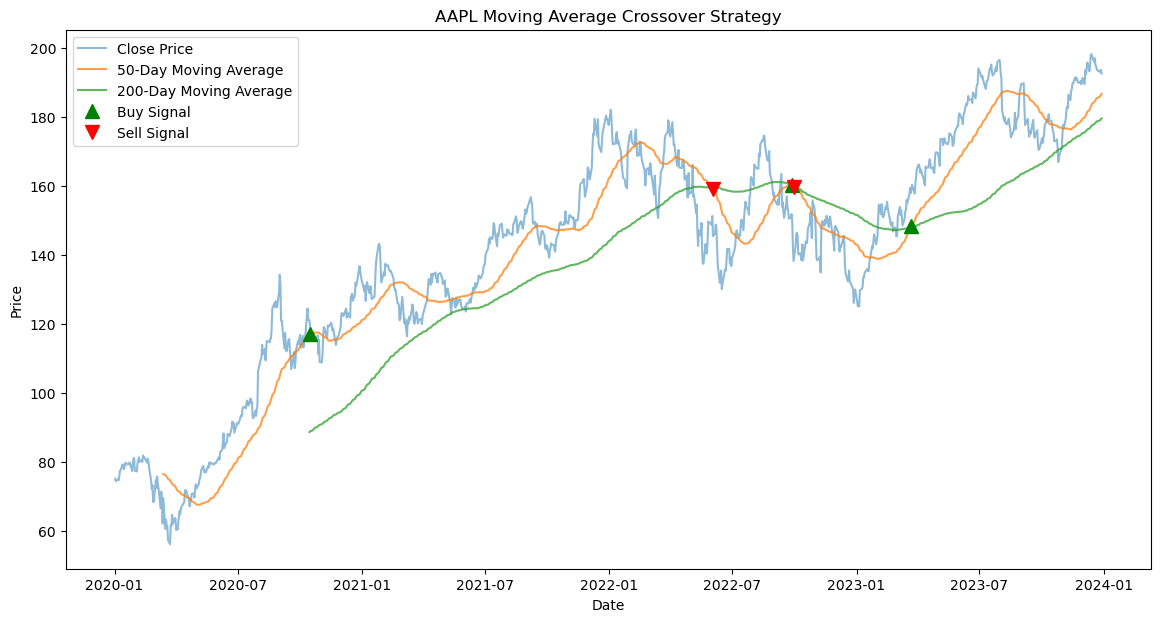

In [7]:
plt.figure(figsize=(14, 7))

# Plot closing price and moving averages
plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['SMA50'], label='50-Day Moving Average', alpha=0.75)
plt.plot(stock_data['SMA200'], label='200-Day Moving Average', alpha=0.75)

# Plot buy signals
plt.plot(stock_data[stock_data['Position'] == 1].index, 
         stock_data['SMA50'][stock_data['Position'] == 1], 
         '^', markersize=10, color='g', label='Buy Signal')

# Plot sell signals
plt.plot(stock_data[stock_data['Position'] == -1].index, 
         stock_data['SMA50'][stock_data['Position'] == -1], 
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('AAPL Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
